# COGS 108 - Final Project 

# Overview

In order to see whether or not there is a significant correlation between the weather and the number of rides made per day in New York, appropriate data has been gathered and analyzed. The weather is divided into three different attributes; temperature, wind speed, and humidity, for each hour during the day in May of 2014. These three attributes were analyzed against the number of Uber rides made in each month, to see if we can visually see the correlation between these three attributes and the rides made.

# Names

- Zijian Liu
- Pin-Hsuan Chen
- Kyle Reed 
- Yunji Ryu
- Jing Wei

# Group Members IDs

- A15723355
- A14012598
- A11839833
- A15729483
- A14767336

# Research Question

Research question: How does the weather condition, specifically wind speed, temperature, humidity, and hourly weather description, affect the overall number of rides during the day in NYC?


## Background and Prior Work

There were no prior Work done for our topic. But based on our experiences with acquiring rides in certain weather conditions, there are numerous reasons why one can consider getting a taxi/Uber compared to getting there by foot or other means. One of the main components that influences this decision is weather. Engineers in the New York State created a system to provide information about the road conditions in New York State, specifically catering towards the more haphazard winter season, providing whether the highway will be blocked or not due to snow and ice operations. They also included a report for each of the observed years to include a more detailed description of the road conditions and list how accurate their report was. But not much of these affected the road conditions during the non-winter seasons. Whether it's the wind travel advisory warnings, slippery driveways on a rainy day, drivers and the riders tend to be more wary of the environmental situations around the road regardless of the season, which affects their decision to get a ride or not, conclusively affecting the number of rides that are made in New York. In order to investigate this information, we decided to use our readily available public data to analyze and infer to the possible correlations listed in our research question and hypothesis.

References (include links):
- 1) https://www.dot.ny.gov/wta (New York State Winter Travel Advisory System for 2014 - 2015 winter season)
- 2) https://www.dot.ny.gov/divisions/engineering/technical-services/highway-data-services/traffic-data (Traffic Data Report based on various regions in New York State in 2014)

# Hypothesis


1. Temperature will have an effect on ride count.
2. Wind speed will have an effect on ride count.
3. Humidity will have an effect on ride count.
4. Weather description will have an effect on ride count. 

We predict that these factor will correlate to the number of rides in some way. It is harder to say whether it will be a negative or positive correlation because unfavorable weather conditions can include either extremely low temperatures or extremely high temperatures. However, we predict ride counts to be higher on days with unfavorable weather conditions, such as thunderstorm or rain. For instance, if for a particular hour, the wind speed, humidity, and temperature are all relatively higher compared to the whole dataset, we predict the ride count to be higher as well.

We believe that unfavorable weather conditions will lead to higher ride counts because people are less willing to walk or take public transportation in those conidtions. For example, if the weather was nice and sunny, people are more willing to save money and walk a couple of blocks. However, if it was rainy and cold, there is a higher chance of people getting a ride so that they can stay dry and warm. 

# Dataset(s)

- Dataset Name: Historical Hourly Weather Data 2012-2017
- Link to the dataset: https://www.kaggle.com/selfishgene/historical-hourly-weather-data
- Number of observations: [to be filled]
- Description: This dataset includes hourly weather data for 30 US cities and others, from 2012 to 2017. Each attributes of the weather is divided into separate data sources on the website; acquired from Weather API and sorted by Kaggle user 'Selfish Gene'.


- Dataset Name: Historical Uber Rides Data May 2014
- Link to the dataset: https://github.com/fivethirtyeight/uber-tlc-foil-response
- Number of observations: 652435
- description: This data includes the Uber rides in New York City in May 2014, but the raw data is base on the time, latitude and longitude of each time people use Uber. We analyzed the raw data and counted the use of Uber by hour.

# Setup

In [24]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import datetime
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import patsy
import statsmodels.api as sm

from scipy.stats import pearsonr, norm, ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data cleaning

Describe your data cleaning steps here.

The first dataset we are going to clean is the ride data. Our cleaning steps include:
1. Load and read all the CSV file. We will also take a look at what the dataset looks like and how many enteries there are. Here we noticed that we need to condense our dataset in someway to match the hourly weather descriptions. 
2. We decided to condense the ride data by hour to show a ride count for each hour of everyday of a month. 

In [3]:
# Step 1 
pickup_df = pd.read_csv('uber-raw-data-may14.csv')
pickup_df.head()
print(pickup_df.shape)

(652435, 4)


In [4]:
#Step 2

#compress all raw ride incidences into a count of rides per hour, and save to separate csv
'''
#initialize counts dict for each hour in may
counts = {}
for date in np.arange(1,32):
    for time in np.arange(0,24):
        counts["5/{}/2014 {}".format(date,time)] = 0
        
#run through raw data and add each ride to its respective hour within the dict
for index, row in pickup_df.iterrows():
        counts[row[0][:row[0].index(":")]] += 1

#save counts dict as csv
with open('uber_hourly_counts_may.csv', 'w') as f:
    for key in counts.keys():
        f.write("%s,%s\n"%(key,counts[key]))
'''

'\n#initialize counts dict for each hour in may\ncounts = {}\nfor date in np.arange(1,32):\n    for time in np.arange(0,24):\n        counts["5/{}/2014 {}".format(date,time)] = 0\n        \n#run through raw data and add each ride to its respective hour within the dict\nfor index, row in pickup_df.iterrows():\n        counts[row[0][:row[0].index(":")]] += 1\n\n#save counts dict as csv\nwith open(\'uber_hourly_counts_may.csv\', \'w\') as f:\n    for key in counts.keys():\n        f.write("%s,%s\n"%(key,counts[key]))\n'

Since we are only interested in New York, we are going to drop data for other cities. 
We are only interested in data for May 2014, so we will modify the dataframe so that it only contains data for that particular month.
Unfortunately, the format of date and time for pickup_df and weather_description_df do not match up. To solve this,
    1. We figured out the type for the datetime object 
    2. Using to_datetime, we converted them into the same format.
Now we have a minimal dataframe. 

In [5]:

weather_description_df = pd.read_csv('weather_description.csv')

###
#data frame: pickup_df contains trip data, weather_description_df contains weather data

# cleaning data, dropping everything not related to New York City 
weather_description_df = weather_description_df[['datetime','New York']].dropna()

# reading raw data for uber rides
pickup_df = pickup_df[['Date/Time']]
pickup_df.head()



# printing the first element in both data frame to see the format
print("WEATHER: "+ weather_description_df['datetime'].iloc[:3])
print("PICKUP:  "+ pickup_df['Date/Time'].iloc[:3])

print("--------")
''' 
How to drop data whose year and month doesn't match? i.e. dropping rows in which years aren't 2014
How to format the date so that everything is in sync with each other?
After cleaning, how to relate trip numbers at a certain time period with that time?
'''
#pickup_df['Date/Time'] = datetime.strptime(str, '%m-%d-%y')
weather_description_df['datetime'] = pd.to_datetime(weather_description_df['datetime'])

# this is how you convert timestamps object to str and use contains with it
weather_description_df = weather_description_df[weather_description_df['datetime'].astype(str).str.contains('2014-05')]
pickup_df['Date/Time'] = pd.to_datetime(pickup_df['Date/Time'])
print("AFTER CONVERSION: ")
pickup_df['Date/Time']
#weatherdesc_clean = 
weather_description_df[weather_description_df['datetime'].astype(str).str.contains('2014')]



1    WEATHER: 2012-10-01 13:00:00
2    WEATHER: 2012-10-01 14:00:00
3    WEATHER: 2012-10-01 15:00:00
Name: datetime, dtype: object
0    PICKUP:  5/1/2014 0:02:00
1    PICKUP:  5/1/2014 0:06:00
2    PICKUP:  5/1/2014 0:15:00
Name: Date/Time, dtype: object
--------
AFTER CONVERSION: 


,datetime,New York
13836,2014-05-01 00:00:00,moderate rain
13837,2014-05-01 01:00:00,moderate rain
13838,2014-05-01 02:00:00,moderate rain
13839,2014-05-01 03:00:00,heavy intensity rain
13840,2014-05-01 04:00:00,heavy intensity rain
13841,2014-05-01 05:00:00,heavy intensity rain
13842,2014-05-01 06:00:00,heavy intensity rain
13843,2014-05-01 07:00:00,heavy intensity rain
13844,2014-05-01 08:00:00,heavy intensity rain
13845,2014-05-01 09:00:00,heavy intensity rain


In [6]:
# calling count() on the column containing New York data to see the specific content for weather description
description_item = weather_description_df.groupby(["New York"]).count()
print(description_item)

                              datetime
New York                              
broken clouds                      106
few clouds                          43
fog                                 11
haze                                24
heavy intensity drizzle              1
heavy intensity rain                27
light intensity drizzle             10
light rain                         149
mist                               104
moderate rain                       19
overcast clouds                     61
scattered clouds                    65
sky is clear                       120
thunderstorm                         2
thunderstorm with heavy rain         1
very heavy rain                      1


In [7]:
# trying to understand data so that we could clean it
print(type(pickup_df['Date/Time'].iloc[0]))
print(pd.to_datetime(pickup_df['Date/Time'].iloc[0]))
#type(weather_description_df['datetime'].astype(str).iloc[0])


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-01 00:02:00


The steps included to clean the temperature dataset are as follows:
1. Load the CSV file. 
2. Keep only the datasets that are for May. 
3. Convert enteries in temperature from Kelvin to fahrenheit so its easier to interpret result. 


In [8]:
#Step 1 
temperature_df = pd.read_csv('NewYork_Temperature_2014.csv')

#Step 2 
temperature_df = temperature_df[temperature_df['datetime'].astype(str).str.contains('2014-05')]
temperature_df = temperature_df[['datetime','New York']]
print(temperature_df.head())
print(temperature_df.shape)

#Step 3
for i in temperature_df.index.values:
    k_temp = temperature_df.loc[i,'New York']
    f_temp = 9/5*(k_temp-273.15)+32
    f_temp_2 = int(str(f_temp)[:2])
    temperature_df.loc[i,'New York'] = f_temp_2


                 datetime    New York
2880  2014-05-01 00:00:00  283.736000
2881  2014-05-01 01:00:00  284.739000
2882  2014-05-01 02:00:00  284.554000
2883  2014-05-01 03:00:00  285.655500
2884  2014-05-01 04:00:00  285.041667
(744, 2)


In [9]:


    
wind_speed_df = pd.read_csv('Wind_speed_for_2014-2015.csv')
wind_speed_df = wind_speed_df[['datetime','New York']].dropna()
wind_speed_df = wind_speed_df[wind_speed_df['datetime'].astype(str).str.contains('2014-05')]

'''
TODO: renaming all columns for each dataframe
THEN: merge them into a same dataframe
'''
# renaming all the columns so that it correctly matches with types of data stored.
weather_description_df.rename(columns={'New York':'description'}, inplace=True)
temperature_df.rename(columns={'New York':'temperature'}, inplace=True)
wind_speed_df.rename(columns={'New York':'wind speed'}, inplace=True)


In [10]:
# Step 1 
humidity_df = pd.read_csv('humidity.csv')

#Step 2 
humidity_df = humidity_df[['datetime','New York']]
humidity_df = humidity_df[humidity_df['datetime'].astype(str).str.contains('2014-05')]

#checking if there is null values 
print(sum(humidity_df['New York'].isnull()))

#replacing null with -1 
humidity_df['New York'] = humidity_df['New York'].replace(np.NaN, -1)

humidity_df.head()
humidity_df.shape


,datetime,description,temperature,wind speed
0,2014-05-01 00:00:00,moderate rain,51.0,4
1,2014-05-01 01:00:00,moderate rain,52.0,5
2,2014-05-01 02:00:00,moderate rain,52.0,5
3,2014-05-01 03:00:00,heavy intensity rain,54.0,5
4,2014-05-01 04:00:00,heavy intensity rain,53.0,4
5,2014-05-01 05:00:00,heavy intensity rain,54.0,4
6,2014-05-01 06:00:00,heavy intensity rain,55.0,4
7,2014-05-01 07:00:00,heavy intensity rain,56.0,4
8,2014-05-01 08:00:00,heavy intensity rain,57.0,5
9,2014-05-01 09:00:00,heavy intensity rain,57.0,4


Now we can put all the datasets into one dataframe. 

In [11]:
#After running above, we can see the index from all dataframes do not match up. 
#This is due to the different set up for each of them.
weather_description_df = weather_description_df.reset_index(drop=True)
temperature_df = temperature_df.reset_index(drop=True)
wind_speed_df = wind_speed_df.reset_index(drop=True)
humidity_df = humidity_df.reset_index(drop=True)
humidity_df
#comment below line after running for the first time
#rerunning will fail due to two NaN values
#weather_description_df = weather_description_df.join(humidity_df['humidity'])
weather_description_df


,datetime,description,temperature,wind speed,humidity
0,2014-05-01 00:00:00,moderate rain,51.0,4,95.0
1,2014-05-01 01:00:00,moderate rain,52.0,5,94.0
2,2014-05-01 02:00:00,moderate rain,52.0,5,95.0
3,2014-05-01 03:00:00,heavy intensity rain,54.0,5,94.0
4,2014-05-01 04:00:00,heavy intensity rain,53.0,4,94.0


In [12]:
# counts_df contains data for Uber ride count in May 2014 from pickup_df, cleaned in a hourly fashion
counts_df = pd.read_csv('uber_hourly_counts_may.csv')
counts_df

humidity_df
# why 2 NaN?
# There were two missing entry for humidity in May


counts_df = counts_df.reset_index(drop=True)
counts_df.rename(columns={'Count':'ride count'}, inplace=True)

#weather_description_df = weather_description_df.join(counts_df['ride count'])
weather_description_df


,datetime,description,temperature,wind speed,humidity,ride count
0,2014-05-01 00:00:00,moderate rain,51.0,4,95.0,348
1,2014-05-01 01:00:00,moderate rain,52.0,5,94.0,179
2,2014-05-01 02:00:00,moderate rain,52.0,5,95.0,101
3,2014-05-01 03:00:00,heavy intensity rain,54.0,5,94.0,172
4,2014-05-01 04:00:00,heavy intensity rain,53.0,4,94.0,241
5,2014-05-01 05:00:00,heavy intensity rain,54.0,4,94.0,438
6,2014-05-01 06:00:00,heavy intensity rain,55.0,4,93.0,822
7,2014-05-01 07:00:00,heavy intensity rain,56.0,4,93.0,1274
8,2014-05-01 08:00:00,heavy intensity rain,57.0,5,92.0,1237
9,2014-05-01 09:00:00,heavy intensity rain,57.0,4,93.0,853


In [13]:
df = weather_description_df

IndexError: positional indexers are out-of-bounds

In [16]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## NY's Temperature in 2014


# Data Analysis & Results

Now that we have the dataframe we needed, we move on to data analysis. First, we generated our our csv from the dataframe above. That line is removed so that whoever runs this notebook won't accidentally overwrite it. It won't change anything, but there is no need to re-generate the csv file.

In [17]:
'''
cols_plot = ['description', 'temperature','wind speed', 'humidity']
axes = weather_description_df[cols_plot].plot(marker='.', alpha=0.1, linestyle='None', figsize=(11, 9), subplots=True)
for y_axis in axes:
    y_axis.set_ylabel('counts')
'''

"\ncols_plot = ['description', 'temperature','wind speed', 'humidity']\naxes = weather_description_df[cols_plot].plot(marker='.', alpha=0.1, linestyle='None', figsize=(11, 9), subplots=True)\nfor y_axis in axes:\n    y_axis.set_ylabel('counts')\n"

In [25]:
df = pd.read_csv('ride_weather_data.csv')
df = df[['datetime','Count','description','temperature','wind speed','humidity']]
df['wind_speed'] = df['wind speed']
df = df[['datetime','Count','description','temperature','wind_speed','humidity']]
df['temp_diff'] = np.absolute(df['temperature'] - 62.283923)
df.head()
desc = df.describe()
print(desc)
corrs = df.corr()
print(corrs)

             Count  temperature  wind_speed    humidity   temp_diff
count   744.000000   744.000000  744.000000  742.000000  744.000000
mean    876.928763    62.283923    2.138441   65.951482    6.209411
std     569.126758     7.890543    1.933880   22.689961    4.863332
min      52.000000    46.292000    0.000000   18.000000    0.028077
25%     397.500000    56.543000    1.000000   47.000000    2.435577
50%     789.000000    61.223000    2.000000   64.000000    5.103000
75%    1275.500000    66.753500    3.000000   91.000000    8.690039
max    3076.000000    86.162000   12.000000  100.000000   23.878077
                Count  temperature  wind_speed  humidity  temp_diff
Count        1.000000     0.200969   -0.010154  0.022967  -0.089023
temperature  0.200969     1.000000    0.166224 -0.399673   0.328004
wind_speed  -0.010154     0.166224    1.000000 -0.233347   0.173342
humidity     0.022967    -0.399673   -0.233347  1.000000  -0.355033
temp_diff   -0.089023     0.328004    0.173342 -

[Write analysis here]

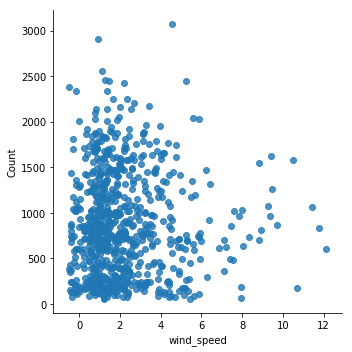

In [26]:
# scatterplot for wind speed and ride counts 
sns.lmplot(x='wind_speed', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)


[Write analysis here]

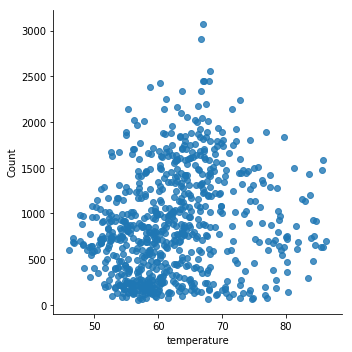

In [27]:
#scatterplot for temperature and ride counts 
sns.lmplot(x='temperature', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)

[Write analysis here]

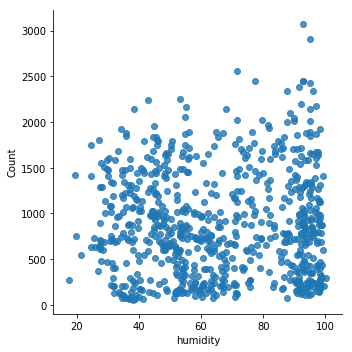

In [28]:
#scatterplot for humidity and ride counts
sns.lmplot(x='humidity', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)

[Write analysis here]

In [29]:
#Range for humidity 
print("Highest humidity is",df['humidity'].max(),"and lowest humidity is",df['humidity'].min())
#Range for temperature 
print("Highest temperature is",df['temperature'].max(),"and lowest temperature is",df['temperature'].min())
outcome, predictors = patsy.dmatrices('Count ~ temp_diff + humidity + wind_speed', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

Highest humidity is 100.0 and lowest humidity is 18.0
Highest temperature is 86.16200000000006 and lowest temperature is 46.292
                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.207
Date:                Tue, 11 Jun 2019   Prob (F-statistic):             0.0859
Time:                        13:49:06   Log-Likelihood:                -5756.9
No. Observations:                 742   AIC:                         1.152e+04
Df Residuals:                     738   BIC:                         1.154e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

[Write analysis here]

In [30]:
outcome, predictors = patsy.dmatrices('Count ~ temp_diff', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.927
Date:                Tue, 11 Jun 2019   Prob (F-statistic):             0.0151
Time:                        13:49:06   Log-Likelihood:                -5772.2
No. Observations:                 744   AIC:                         1.155e+04
Df Residuals:                     742   BIC:                         1.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    941.6172     33.741     27.907      0.0

[Write analysis here]

In [31]:
outcome, predictors = patsy.dmatrices('Count ~ wind_speed', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07651
Date:                Tue, 11 Jun 2019   Prob (F-statistic):              0.782
Time:                        13:49:07   Log-Likelihood:                -5775.2
No. Observations:                 744   AIC:                         1.155e+04
Df Residuals:                     742   BIC:                         1.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    883.3190     31.139     28.367      0.0

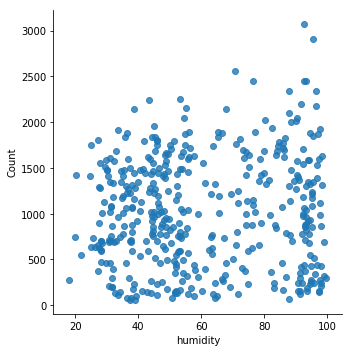

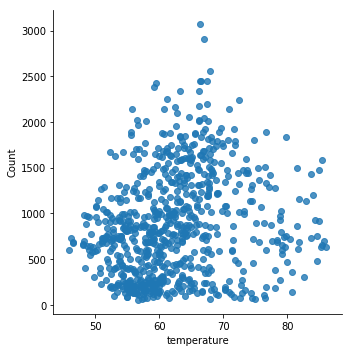

In [32]:
# weather condition combination to ride counts 
# Comfort level according to National Weather services 
# humidity >= 65 - oppressive air condition, lots of moisture in the air 
# 55 > humidity >65 - sticky and muggy https://www.weather.gov/arx/why_dewpoint_vs_humidity
# 87 degrees - too hot in NY https://weather.com/news/news/how-hot-is-too-hot-survey

df_warm = df[df['humidity'] >= 65]
df_warm = df[df['temperature'] > 60]
df_warm.head()
sns.lmplot(x='humidity', y='Count', data=df_warm, fit_reg=False, x_jitter=.5, y_jitter=.5)
sns.lmplot(x='temperature', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)



[Write analysis here]

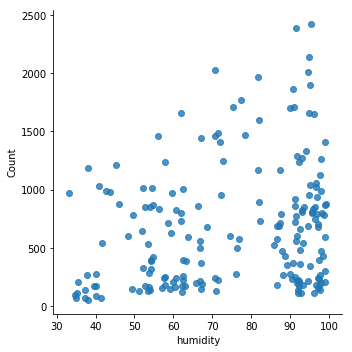

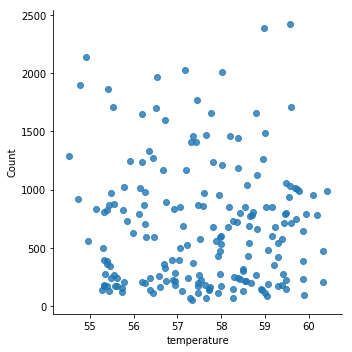

In [33]:
df_cooler = df[df['humidity'] < 65]
df_cooler = df[df['temperature'] < 60]
df_cooler = df_cooler[df_cooler['temperature']> 55]
df_cooler.head()
sns.lmplot(x='humidity', y='Count', data=df_cooler, fit_reg=False, x_jitter=.5, y_jitter=.5)
sns.lmplot(x='temperature', y='Count', data=df_cooler, fit_reg=False, x_jitter=.5, y_jitter=.5)

[Write analysis here]

In [42]:
df.iloc[229]
df.iloc[640]


datetime       2014-05-27 16:00:00
Count                         1434
description           sky is clear
temperature                 83.588
wind_speed                       1
humidity                       NaN
temp_diff                  21.3041
Name: 640, dtype: object

In [36]:
features = ['temperature', 'wind_speed', 'humidity']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['description']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal_component_1'])
finalDf = pd.concat([principalDf, df[['Count']], df[['description']]], axis = 1)
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('PCR', fontsize = 20)
targets = ['light rain', 'sky is clear', 'broken clouds', 'mist', 'scattered clouds', 'overcast clouds', 'few clouds', 'heavy intensity rain','haze','moderate rain','fog','light intensity drizzle','thunderstorm','very heavy rain','thunderstorm with heavy rain','heavy intensity drizzle']
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm', 'darkslategrey', 'wheat','orange','hotpink','navy','teal','aqua','violet','lightgreen']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['description'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1'], finalDf.loc[indicesToKeep, 'Count'], c = color, s = 100)
ax.legend(targets)
ax.grid()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

[Write analysis here]

In [37]:
outcome, predictors = patsy.dmatrices('Count ~ principal_component_1', finalDf)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

NameError: name 'finalDf' is not defined

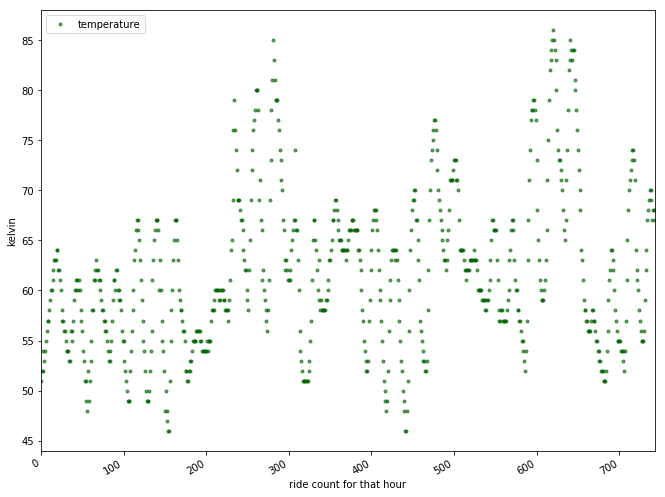

In [17]:
temperature_plot = ['temperature']
axes_temperature = weather_description_df[temperature_plot].plot(marker='.', color="darkgreen",
                                                                 alpha=0.6, 
                                                                 linestyle='None', 
                                                                 figsize=(11, 9), 
                                                                 subplots=True)
for y_axis in axes_temperature:
    y_axis.set_ylabel('kelvin')
for x_axis in axes_temperature:
    x_axis.set_xlabel('ride count for that hour')

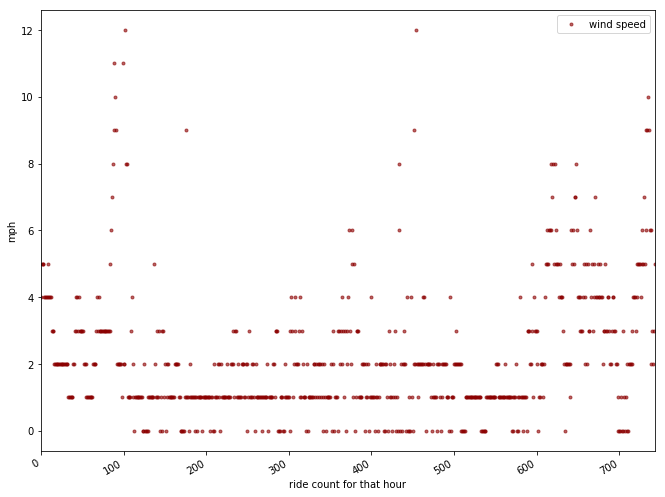

In [19]:
wind_speed_plot = ['wind speed']
axes_wind_speed = weather_description_df[wind_speed_plot].plot(marker='.', color="darkred",
                                                               alpha=0.6, 
                                                               linestyle='None', 
                                                               figsize=(11, 9), 
                                                               subplots=True)
for y_axis in axes_wind_speed:
    y_axis.set_ylabel('mph')
for x_axis in axes_wind_speed:
    x_axis.set_xlabel('ride count for that hour')

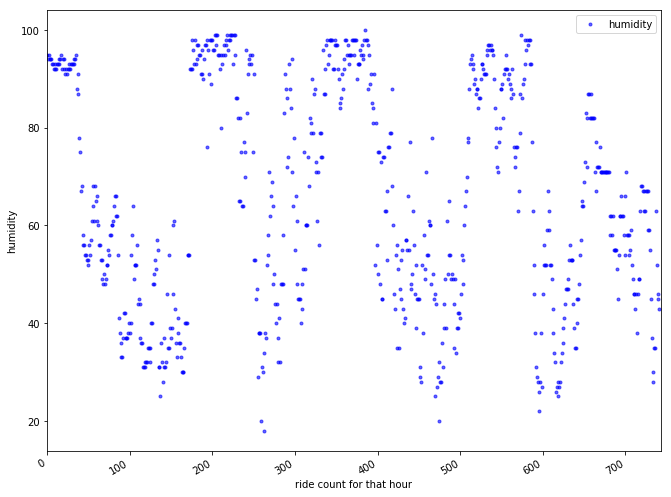

In [20]:
humidity_plot = ['humidity']
axes_humidity = weather_description_df[humidity_plot].plot(marker='.', color="blue",
                                                           alpha=0.6, 
                                                           linestyle='None', 
                                                           figsize=(11, 9), 
                                                           subplots=True)
for y_axis in axes_humidity:
    y_axis.set_ylabel('humidity')
    
for x_axis in axes_humidity:
    x_axis.set_xlabel('ride count for that hour')
    

Include cells that describe the steps in your data analysis.

In [18]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

The data set we are analyzing for this project is public data obtained from an open source. The data on its own does not reveal any private information about individual users as well as Uber drivers so we are not as concerned with personal privacy. However, analyzers could still easily extract a lot of information from these data. For instance, analyzing this data set could reveal users’ commute patterns and preferences. Though this does not point to a specific person, it could be information that could be sold to other companies for profit. From this, companies can target users based on their individual preferences. For example, they could distribute advertisements based on these preferences. Or, rideshare apps, like Uber, could take advantage of all these data and deliberately raise prices when the demand is high. 

# Conclusion & Discussion

Since it is hard to parametrize how a description can effect ride count, we decided it is ambiguious to use description to predict ride count. To see the actual effect of description, we did a PCA on it.